# performance

Performance calculations for the conversion

In [16]:
#| default_exp performance

In [29]:
#| hide
from nbdev.showdoc import *
from fastcore.test import *
from matplotlib import pyplot as plt

In [18]:
#| export
from triumph.motor import evaluate
from triumph.utilities import *

## Triumph TR3A (1959)

The 1959 Triumph TR3A had the following specifications:

- Engine: 2.2 L (2,195 cc) 4-cylinder
- Horsepower: 95 hp (71 kW) @ 5,000 rpm
- Torque: 140 Nm (103 lb-ft) @ 3,000 rpm
- Transmission: 4-speed manual
- Wheelbase: 2,200 mm (87 in)
- Length: 3,900 mm (153 in)
- Width: 1,500 mm (59 in)
- Height: 1,300 mm (51 in)
- Weight: 1,190 kg (~2,650 lb)
- Wheel diameter: 15 in
- Tire size: 165/80R15
- 0-60 mph: 12.5 seconds
- Top speed: 100 mph

The gear ratios for the 1959 Triumph TR3A are:

- 1st gear: 3.7
- 2nd gear: 2.0
- 3rd gear: 1.3
- 4th gear: 1.0

RPMs for the 1959 Triumph TR3A are:

- 1st gear: 1,500 rpm
- 2nd gear: 2,500 rpm
- 3rd gear: 3,500 rpm
- 4th gear: 4,500 rpm

Let's use these data to get some basic information on how the factory version of the TR3A performed.

![images/engine_performance.png](images/engine_performance.png)

In [19]:
gears = ["1st", "2nd", "3rd", "4th"]
gear_ratios = [3.7, 2.0, 1.3, 1.0]
rpms = [1500, 2500, 3500, 4500]
GVWR = 1190 # weight, kg
tire = "165/80R15"
torques = [1250/12, 1350/12, 1400/12, 1250/12]
for gear_ratio, rpm_max, gear, torque in zip(gear_ratios, rpms, gears, torques):
    print(f"{gear} Gear. Ratio: {gear_ratio}, RPM: {rpm_max}")
    torque = Ft_lbs_to_Nm(torque)
    print("\t Torque: ", round(torque), "Nm")
    print(evaluate(gear_ratio, GVWR, "165/80R15", rpm_max, round(torque)))

1st Gear. Ratio: 3.7, RPM: 1500
	 Torque:  141 Nm
{'zero to sixty (sec)': 19.7, 'Top speed (mph)': 15}
2nd Gear. Ratio: 2.0, RPM: 2500
	 Torque:  153 Nm
{'zero to sixty (sec)': 33.6, 'Top speed (mph)': 47}
3rd Gear. Ratio: 1.3, RPM: 3500
	 Torque:  158 Nm
{'zero to sixty (sec)': 50.1, 'Top speed (mph)': 102}
4th Gear. Ratio: 1.0, RPM: 4500
	 Torque:  141 Nm
{'zero to sixty (sec)': 73.0, 'Top speed (mph)': 170}


In [20]:
# Check the gear results:
# First gear:
test_eq(evaluate(3.7, 1190, "165/80R15", 1500, round(Ft_lbs_to_Nm(1250/12))),
        {'zero to sixty (sec)': 19.7, 'Top speed (mph)': 15})
# Second gear:
test_eq(evaluate(2.0, 1190, "165/80R15", 2500, round(Ft_lbs_to_Nm(1350/12))),
        {'zero to sixty (sec)': 33.6, 'Top speed (mph)': 47})
# Third gear:
test_eq(evaluate(1.3, 1190, "165/80R15", 3500, round(Ft_lbs_to_Nm(1400/12))),
        {'zero to sixty (sec)': 50.1, 'Top speed (mph)': 102})
# Fourth gear:
test_eq(evaluate(1.0, 1190, "165/80R15", 4500, round(Ft_lbs_to_Nm(1250/12))),
        {'zero to sixty (sec)': 73.0, 'Top speed (mph)': 170})

## TR3A Electric Conversion

Now let's look at what these data might look like for an electric conversion. We'll assume that the electric motor has the following characteristics:

- Voltage: 132 V
- Horsepower: 105 kW @ 3,000 rpm
- Torque: 235 Nm @ 3,000 rpm
- RPM max: 7,000 rpm

![images/motor_performance.png](images/motor_performance.png)

In [21]:
gear_ratio = 1.8
rpm_max = 7000
GVWR = 1190 # weight, kg
tire = "165/80R15"
torque = 235

print(f"Ratio: {gear_ratio}, RPM: {rpm_max}")
print(evaluate(gear_ratio, GVWR, "165/80R15", rpm_max, torque))

Ratio: 1.8, RPM: 7000
{'zero to sixty (sec)': 24.3, 'Top speed (mph)': 147}


## Visualize these relationships

We will use a plot to see how changing the `gear_ratio` affects the performance characteristics of the vehicle.


In [22]:
#| hide
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import numpy as np

import pandas as pd
from plotly.subplots import make_subplots


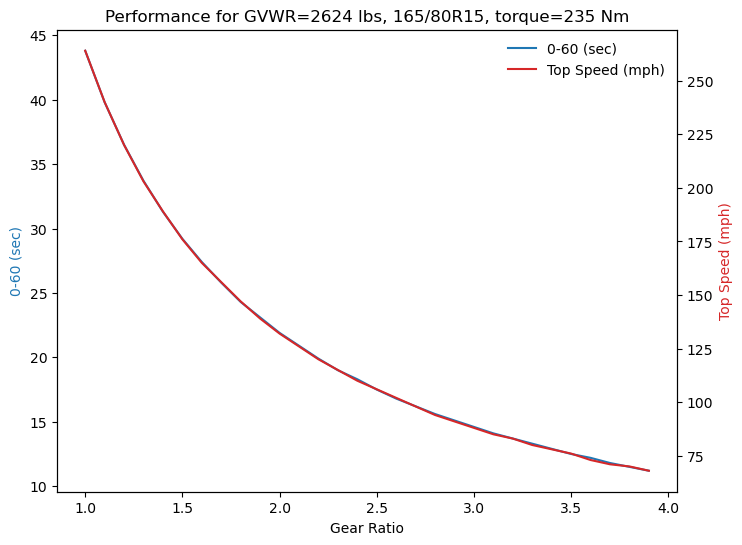

In [33]:
#|echo: false
gear_ratios = np.arange(1, 4, 0.1)
rpm_max = 7000
GVWR = 1190 # weight, kg
tire = "165/80R15"
torque = 235
results = [evaluate(gear_ratio, GVWR, "165/80R15", rpm_max, torque) for gear_ratio in gear_ratios]
df = pd.DataFrame(results, index=gear_ratios)

# Define the size of the overall figure
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotting the zero to sixty times
line1, = ax1.plot(df.index, df["zero to sixty (sec)"], color="tab:blue", label="0-60 (sec)")
ax1.set_xlabel('Gear Ratio')
ax1.set_ylabel('0-60 (sec)', color="tab:blue")

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Plotting the top speed on the second y-axis
line2, = ax2.plot(df.index, df["Top speed (mph)"], color="tab:red", label="Top Speed (mph)")
ax2.set_ylabel('Top Speed (mph)', color="tab:red")

# Adding title using f-string for formatting
plt.title(f"Performance for GVWR={Kg_to_lbs(GVWR)} lbs, {tire}, torque={torque} Nm")

# Display the legend
# Create a legend for the whole figure
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", frameon=False)

# Display the plot
plt.show()

In [24]:
#| hide
import nbdev; nbdev.nbdev_export()